#### Sales Prediction

**Importing Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("This task is done by Palle Sai Punith Reddy")

This task is done by Palle Sai Punith Reddy


**Loading Dataset**

In [3]:
data = pd.read_csv("Advertising.csv")

In [4]:
# display data
data

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
# to display first 5 rows of data
data.head()  

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# to display last 5 rows of data
data.tail()  

,Id,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
# display columns
data.columns

Index(['Id', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
# display shape (rows, columns) of data
data.shape

(200, 5)

In [9]:
# to display basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
# to display the content of the data
data.describe()

,Id,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
# to check for null values
data.isnull().sum()

Id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
# to delete Species Class from the dataset
data.drop(columns = ['Id'], axis=1,inplace=True)

In [13]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**Exploratory Data Analysis**

Text(0, 0.5, 'Sales')

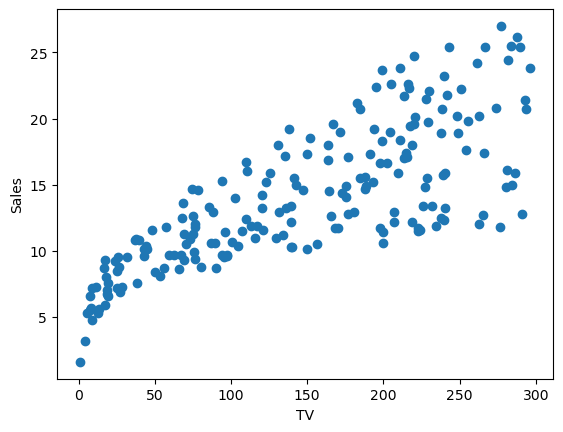

In [14]:
# Plotting Scatterplot

plt.scatter(x=data['TV'], y=data['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

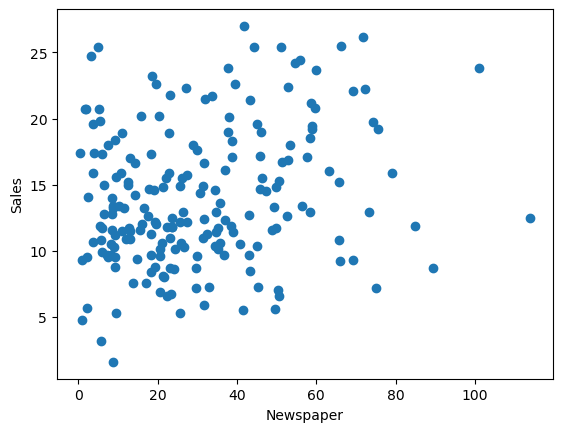

In [15]:
plt.scatter(x=data['Newspaper'], y=data['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

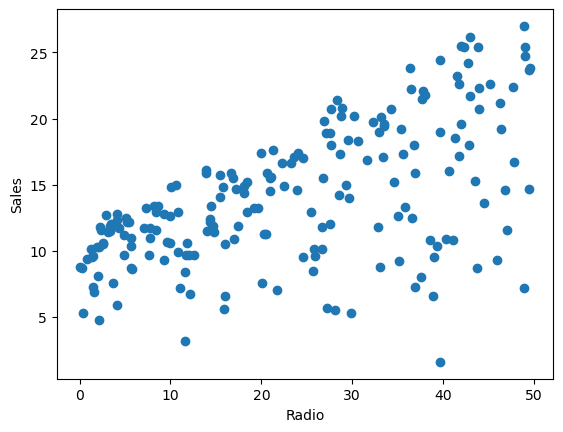

In [16]:
plt.scatter(x=data['Radio'], y=data['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')

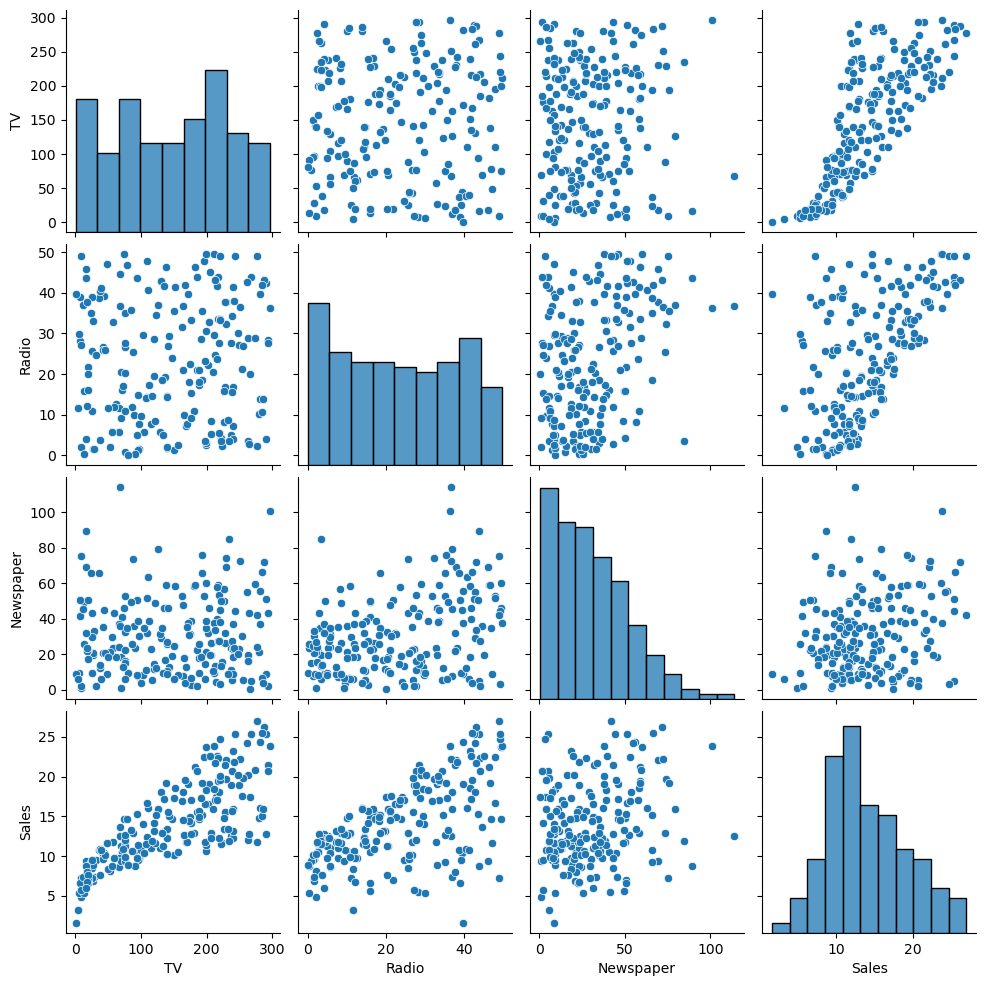

In [17]:
#Plotting Pairplot
sns.pairplot(data)

<Axes: >

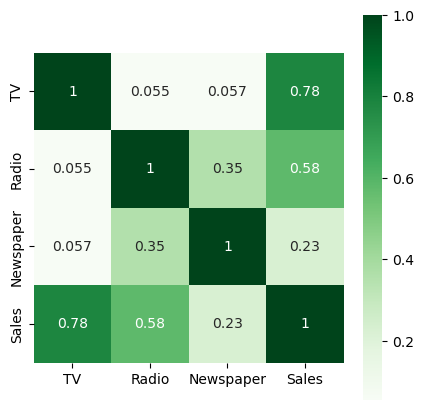

In [18]:
# Plotting Heatmap

corr_mat = data.corr()                 #correlation matrix
plt.figure(figsize=(5,5))           # setting size of figure
sns.heatmap(corr_mat, cmap='Greens', square=True, annot=True)

**Splitting Features And Target**

In [19]:
x = data.drop(['Sales'], axis=1)

In [20]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [21]:
y = data['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

**Model Building**

In [22]:
#Splitting data into 2 parts - training data and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [23]:
print("Training data shape is:",x_train.shape)
print('Testing data shape is:',x_test.shape)

Training data shape is: (160, 3)
Testing data shape is: (40, 3)


**Using Linear Regression**

In [24]:
#Using Linear Regression to Train the Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
# Model Training
model.fit(x_train,y_train)

LinearRegression()

In [26]:
model.predict(x_test)

array([13.7907978 , 14.59424374, 10.55612822,  9.90002998, 10.06819472,
       18.27475851, 15.19128878,  3.44438763, 20.52267528, 11.81767822,
       14.80881144, 12.72461879, 21.13950252, 14.24324005, 15.72214994,
       16.95740482, 10.07042002, 16.62578593,  9.58068105, 12.39525472,
       16.92371559, 10.09265438,  7.99220556, 13.77785614, 21.12007031,
       14.30604103,  7.02891791,  7.429204  , 15.33846692, 13.40314562,
       14.94482091, 10.01155059, 11.92177411, 16.33866375,  6.43543949,
        9.64221908, 13.03688854, 20.4330587 ,  9.03909486, 11.30633312])

In [27]:
# print the accuracy (performance)
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  84.7551325142633
